In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Data Sets/wine_data_quality.csv")

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         21000 non-null  float64
 1   volatile_acidity      21000 non-null  float64
 2   citric_acid           21000 non-null  float64
 3   residual_sugar        21000 non-null  float64
 4   chlorides             21000 non-null  float64
 5   free_sulfur_dioxide   21000 non-null  float64
 6   total_sulfur_dioxide  21000 non-null  float64
 7   density               21000 non-null  float64
 8   pH                    21000 non-null  float64
 9   sulphates             21000 non-null  float64
 10  alcohol               21000 non-null  float64
 11  quality               21000 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.9 MB


In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df.shape

(21000, 12)

In [7]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df['quality'].value_counts()

quality
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: count, dtype: int64

In [9]:
X = df.drop(columns=['quality'])
y = df['quality']

In [10]:
X.shape

(21000, 11)

## Check and Handle the Outlier

In [11]:
int_feature=X.select_dtypes(include=["float64","int64"]).columns
print("Total number of integer feature : ", int_feature.shape[0])
print("Integer feature names: ", int_feature)

Total number of integer feature :  11
Integer feature names:  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


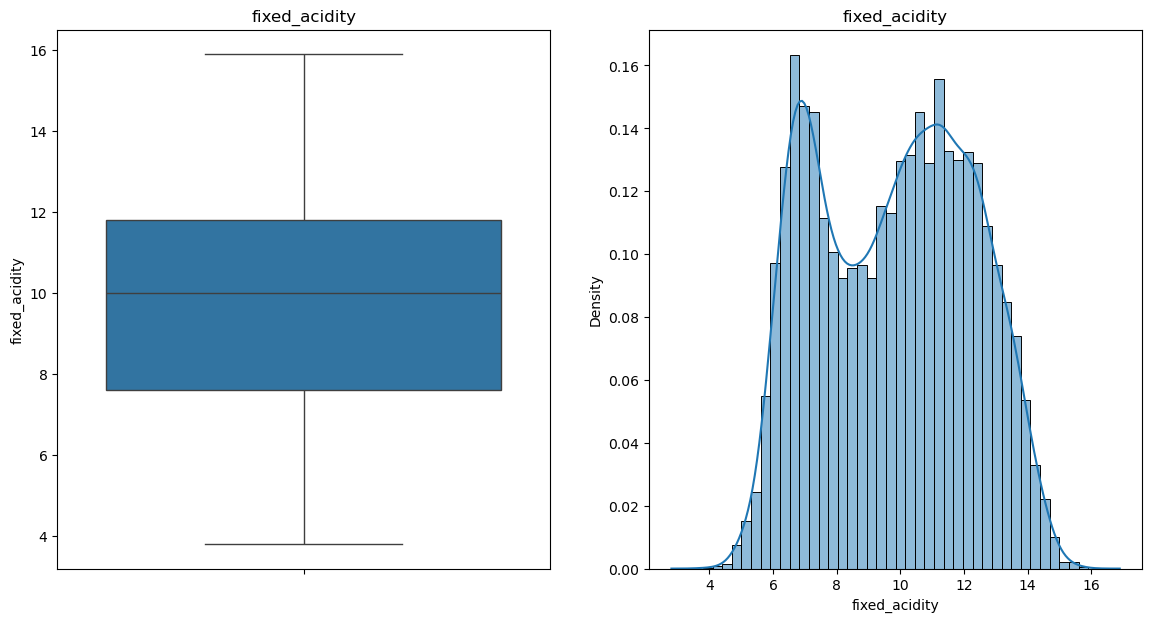

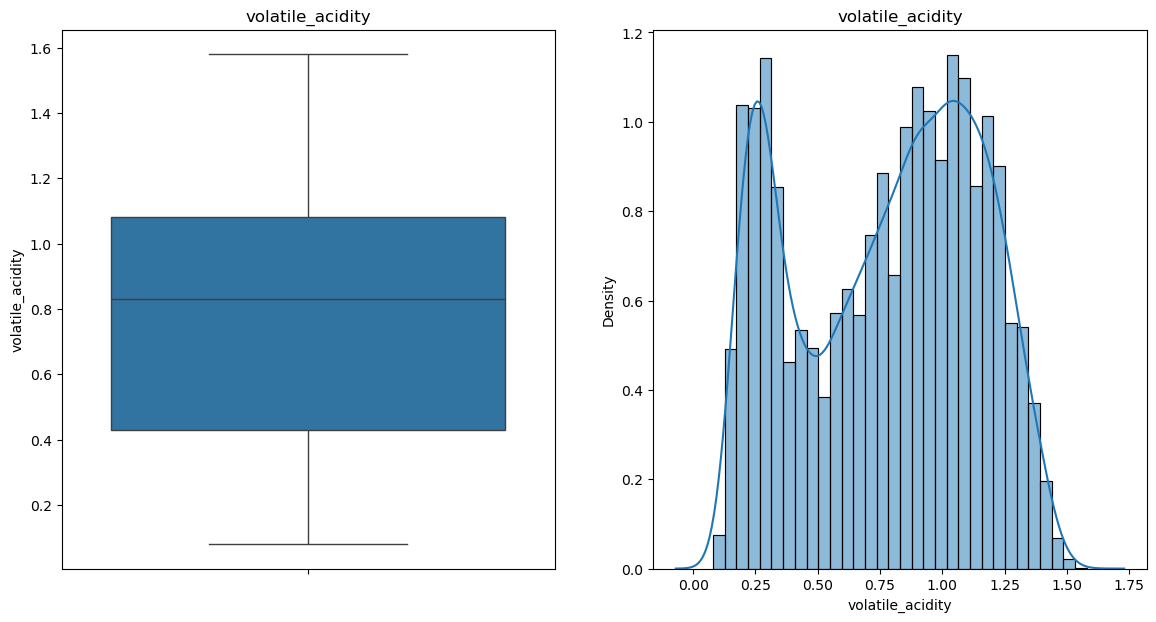

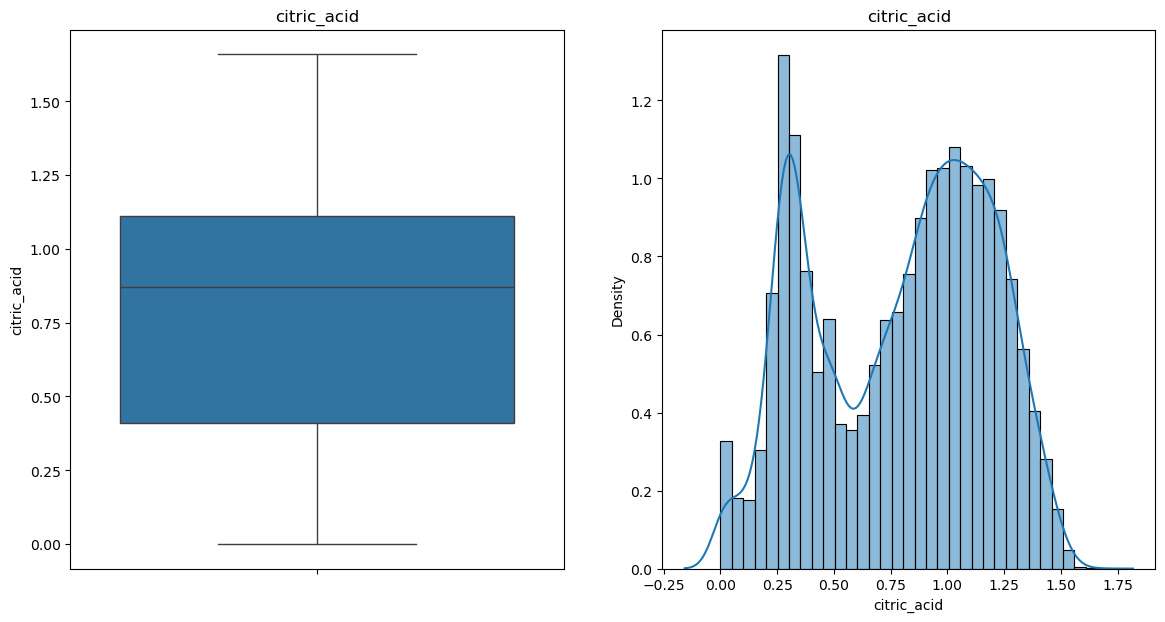

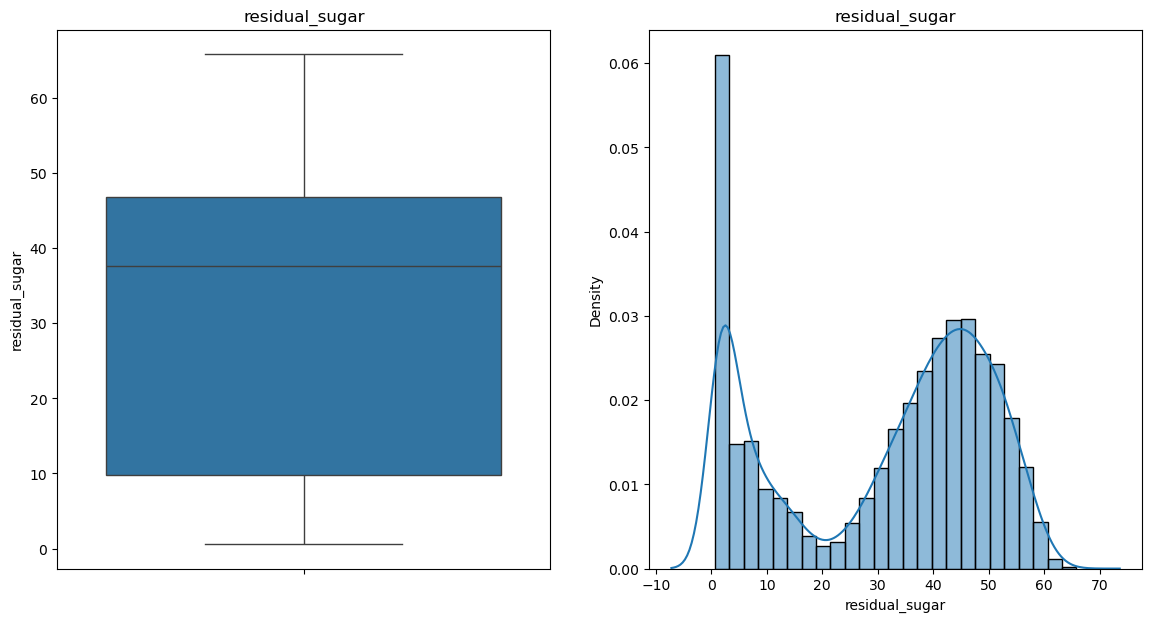

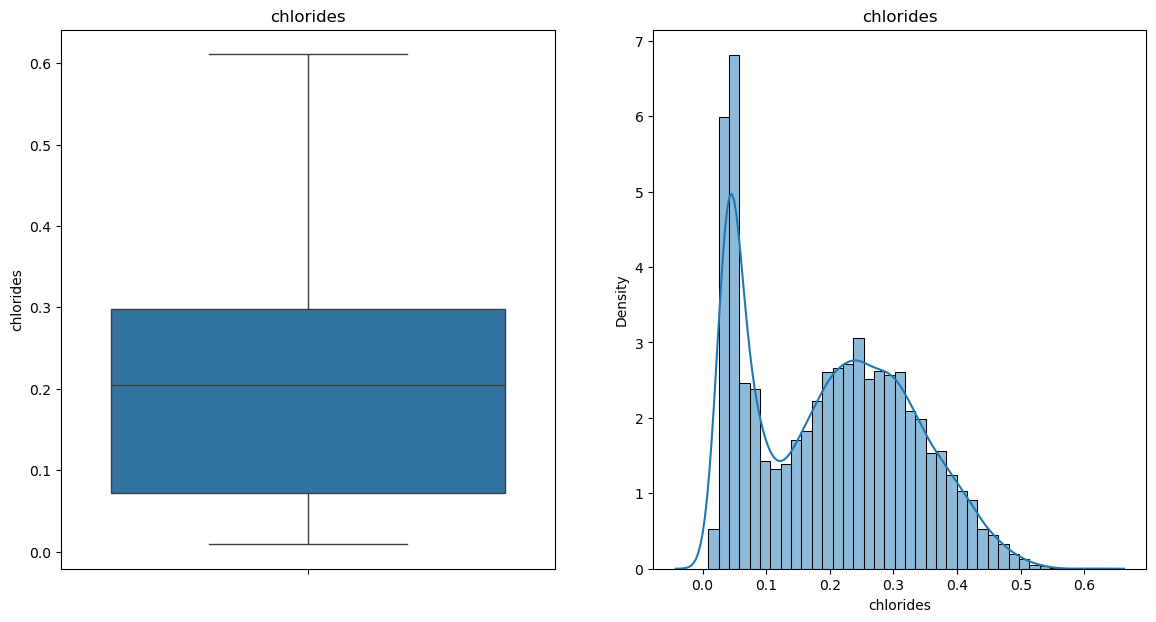

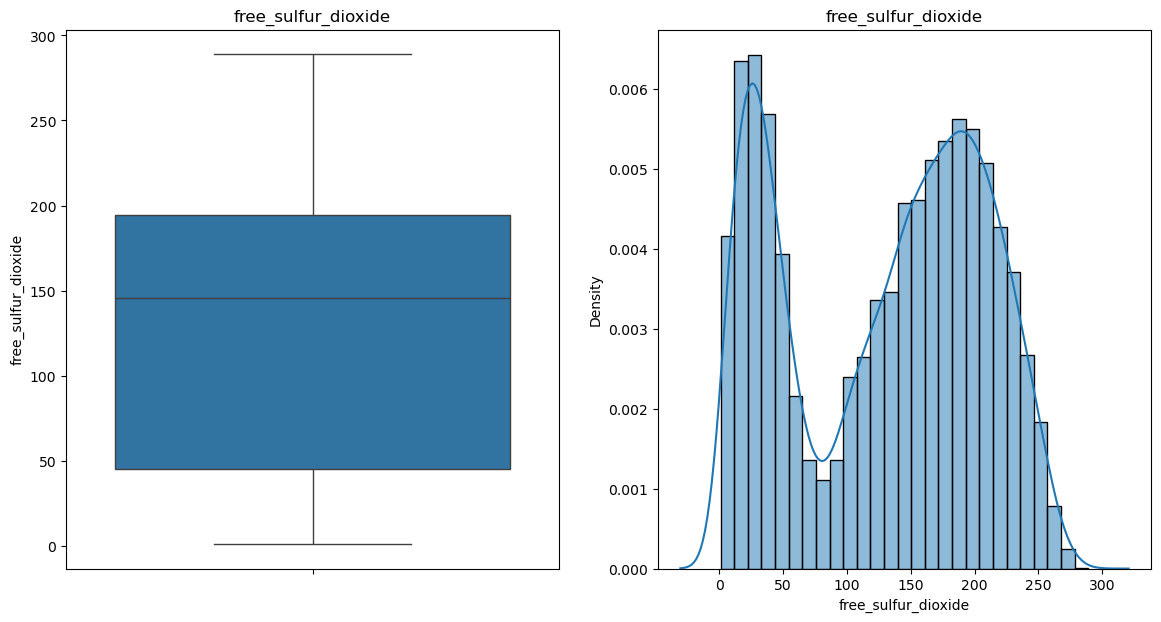

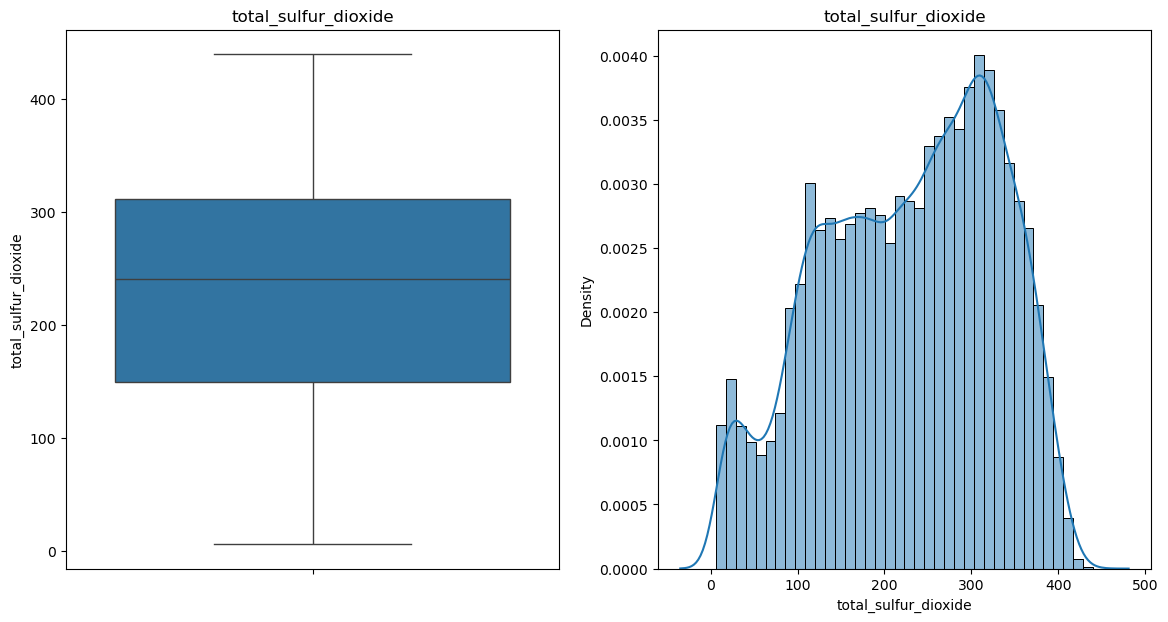

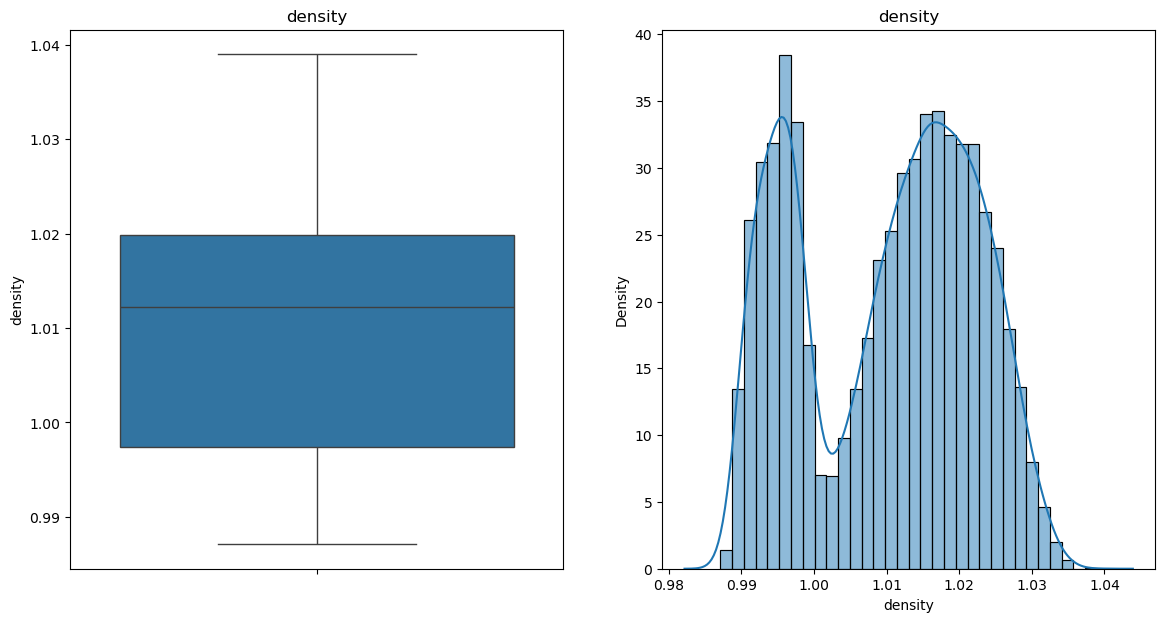

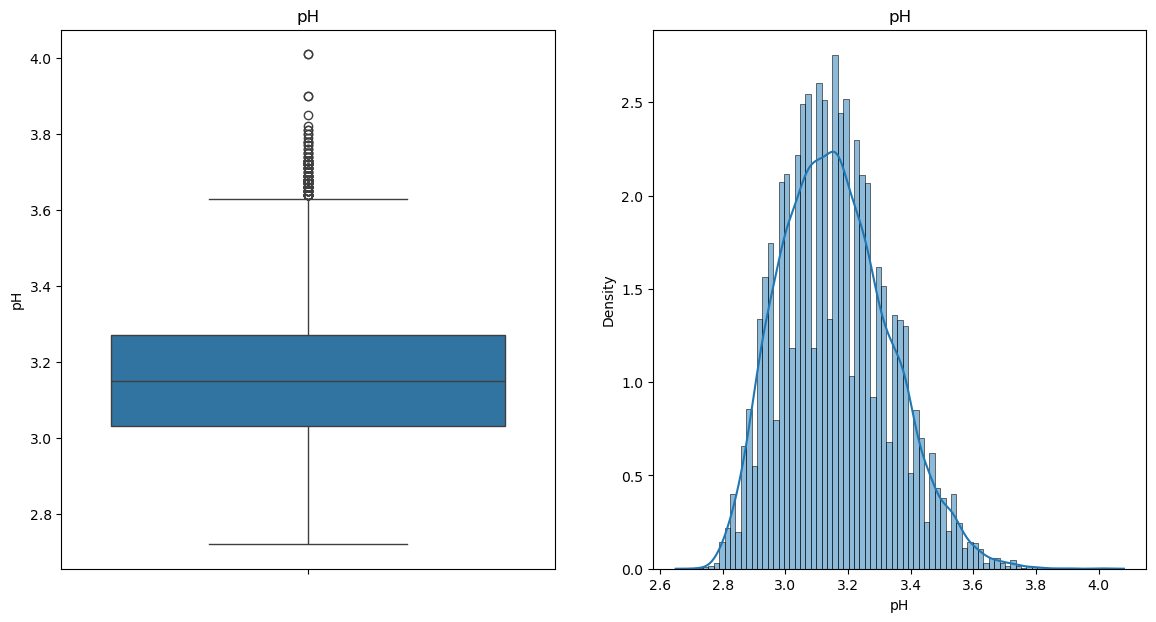

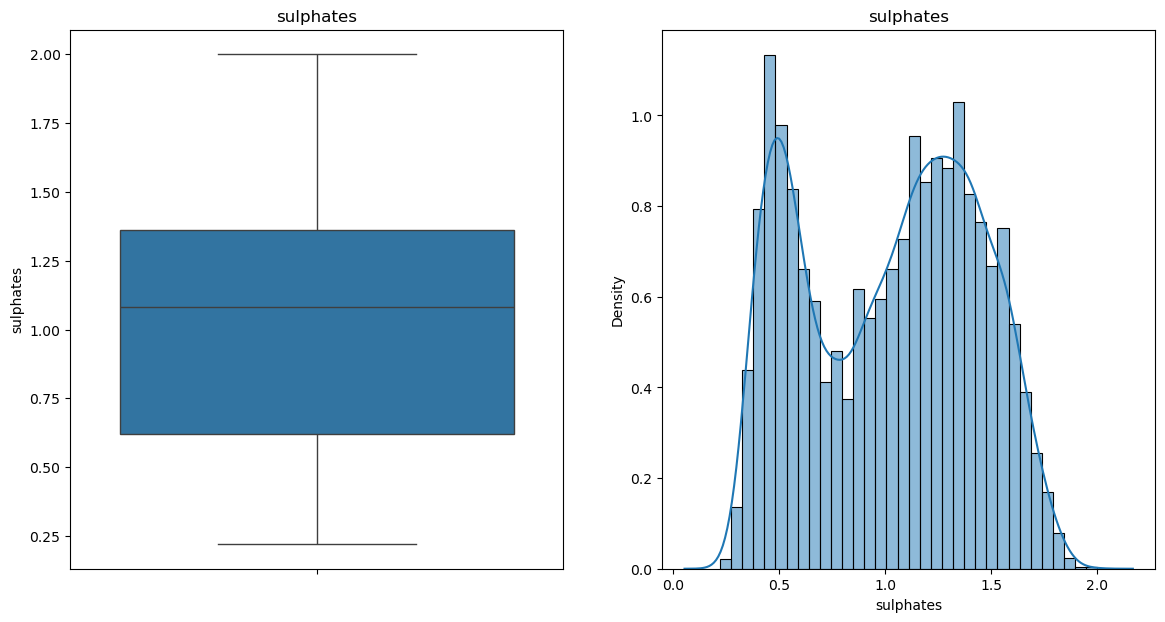

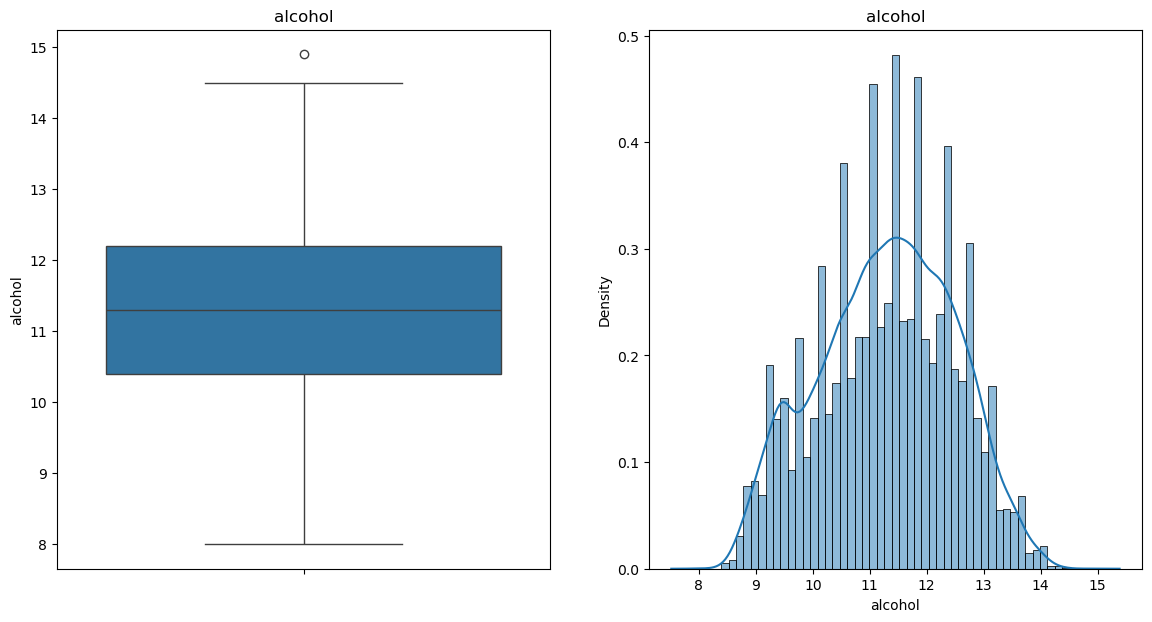

In [12]:
for col in int_feature:
   plt.figure(figsize=(14,7))
   plt.subplot(121)
   sns.boxplot(X[col])
   plt.title(col)
    
   plt.subplot(122)
   sns.histplot(X[col], kde=True,stat="density", kde_kws=dict(cut=3))
   plt.title(col)
plt.show()

In [13]:
new_df_cap = X.copy()
for col in int_feature:
       percentile25 = X[col].quantile(0.25)
       percentile75 = X[col].quantile(0.75)

       iqr = percentile75 - percentile25

       upper_limit = percentile75 + 1.5 * iqr
       lower_limit = percentile25 - 1.5 * iqr
       #capping
       
 
       new_df_cap[col] = np.where(
         new_df_cap[col] > upper_limit,
         upper_limit,
         np.where(
                  new_df_cap[col] < lower_limit,
                  lower_limit,
                  new_df_cap[col]
                  )
       )

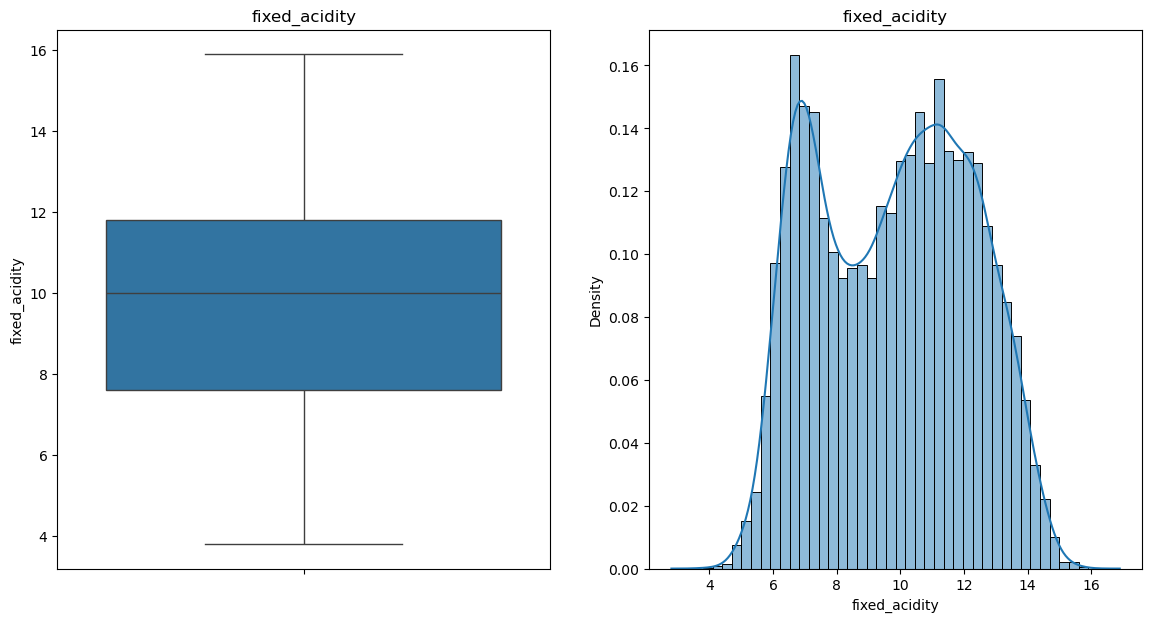

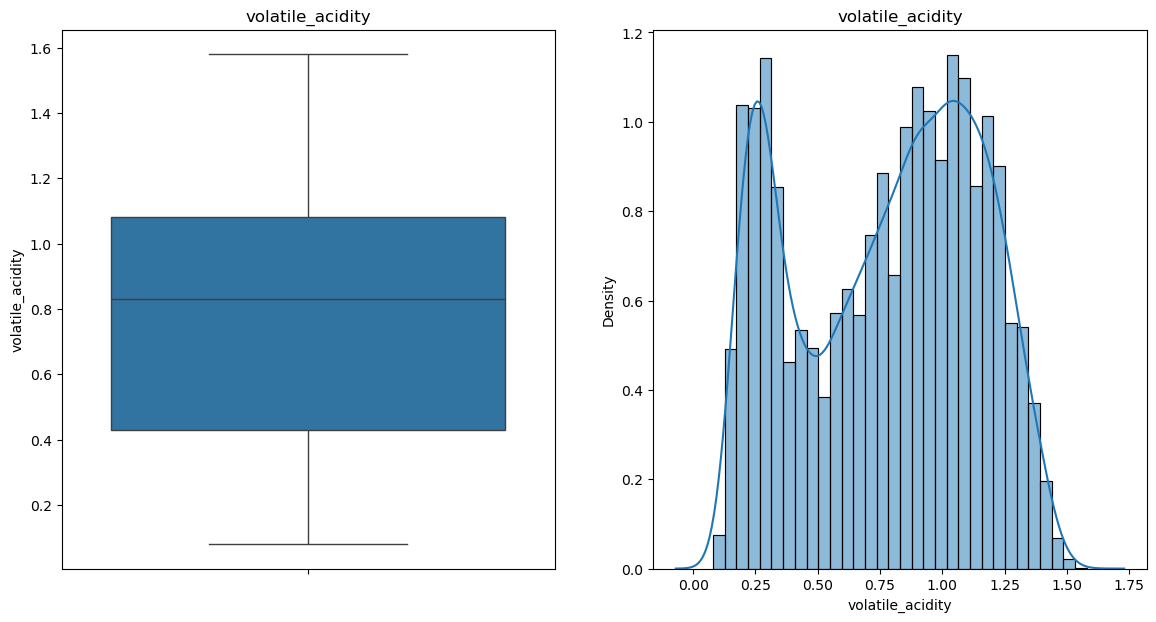

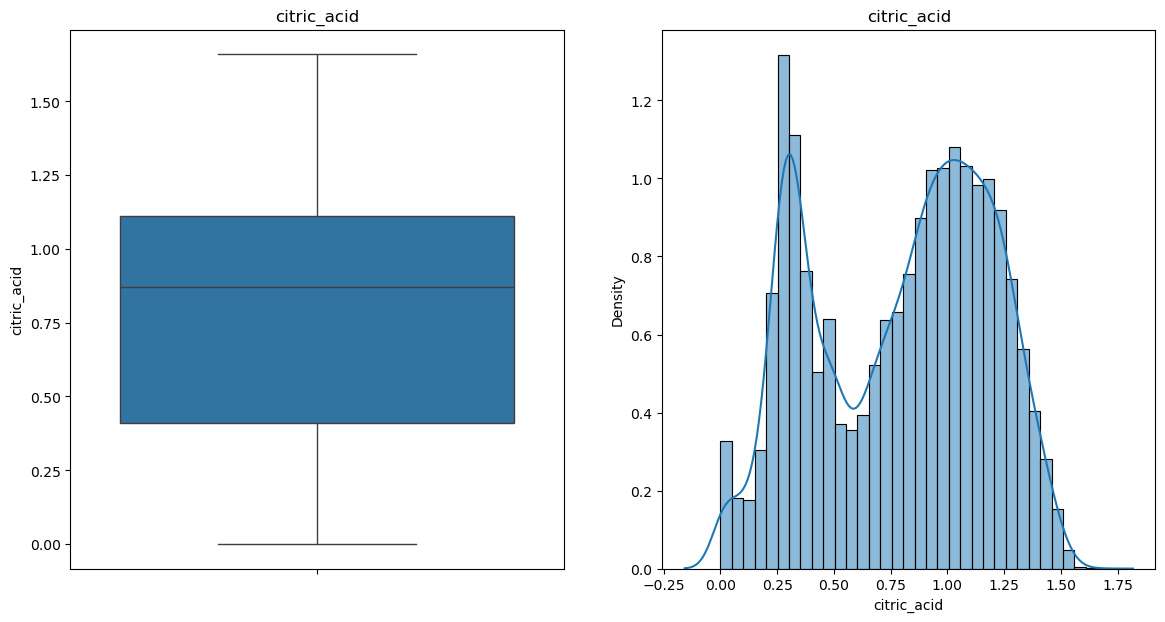

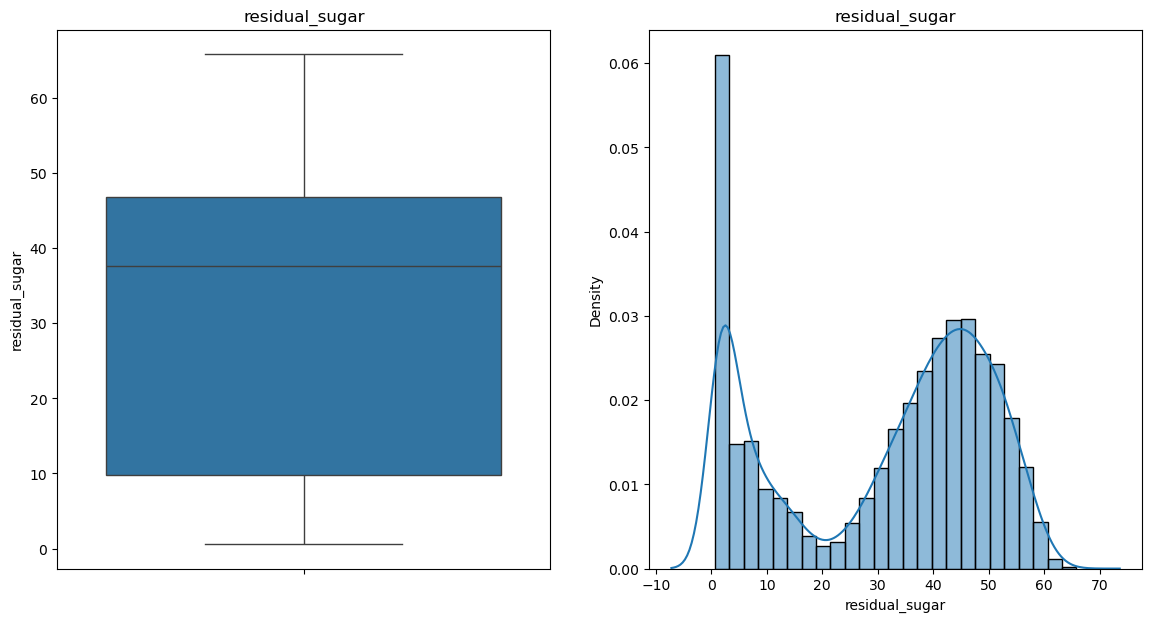

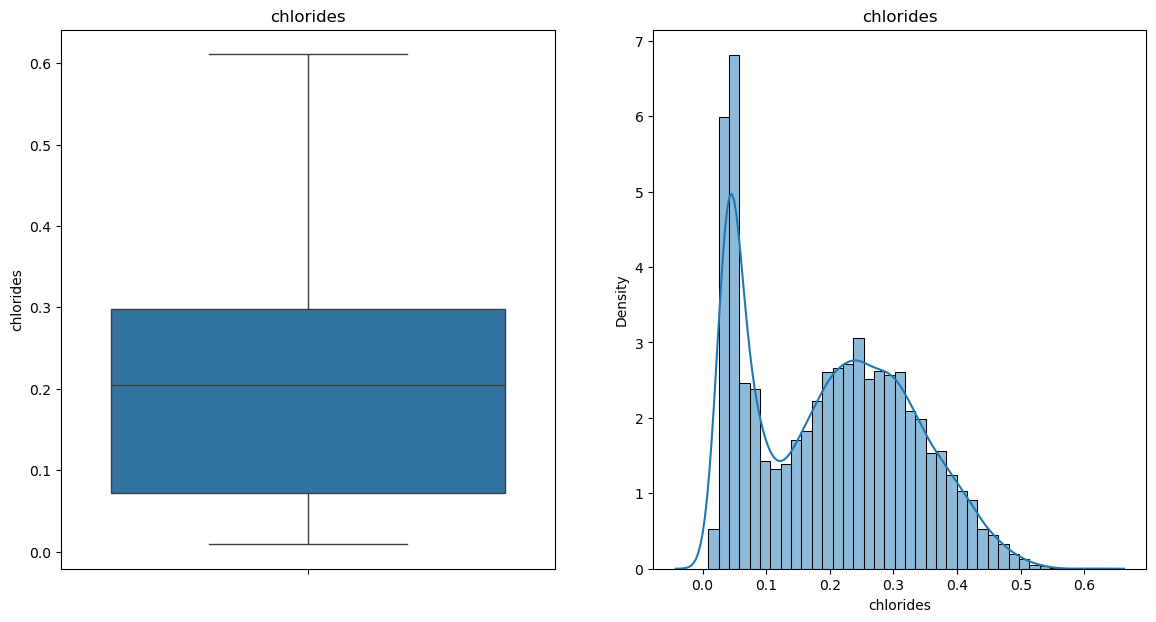

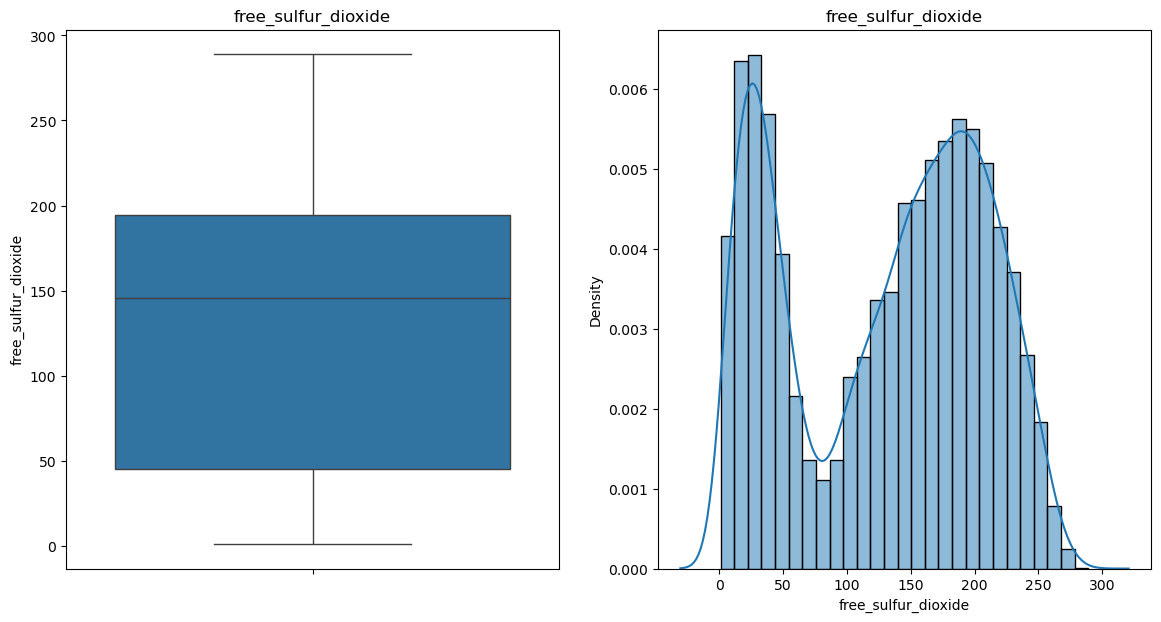

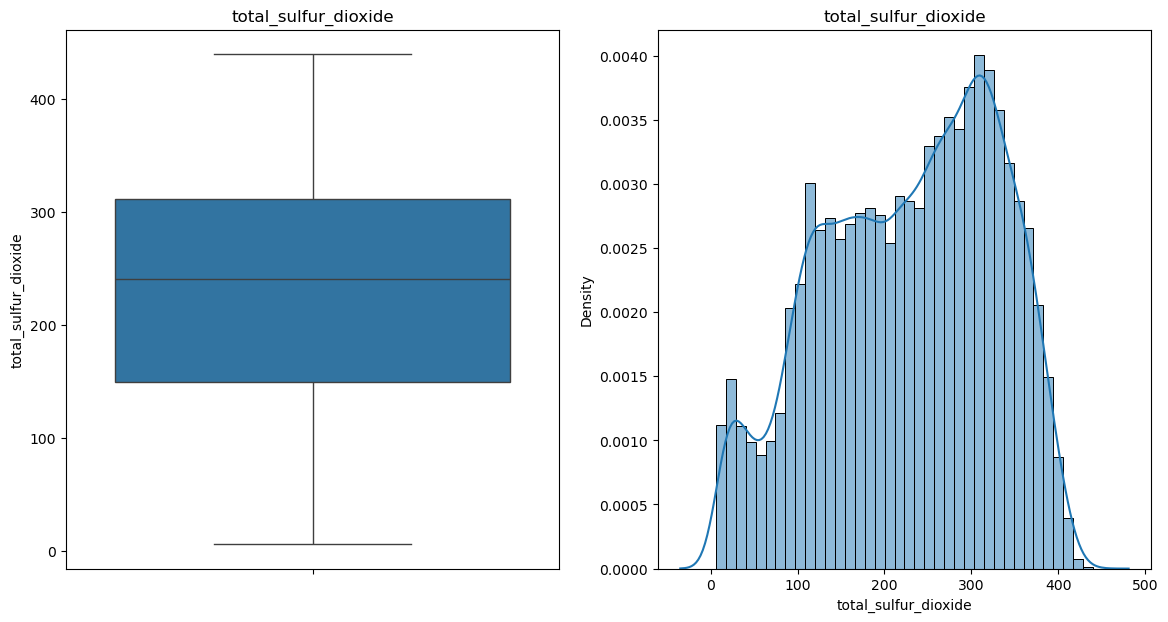

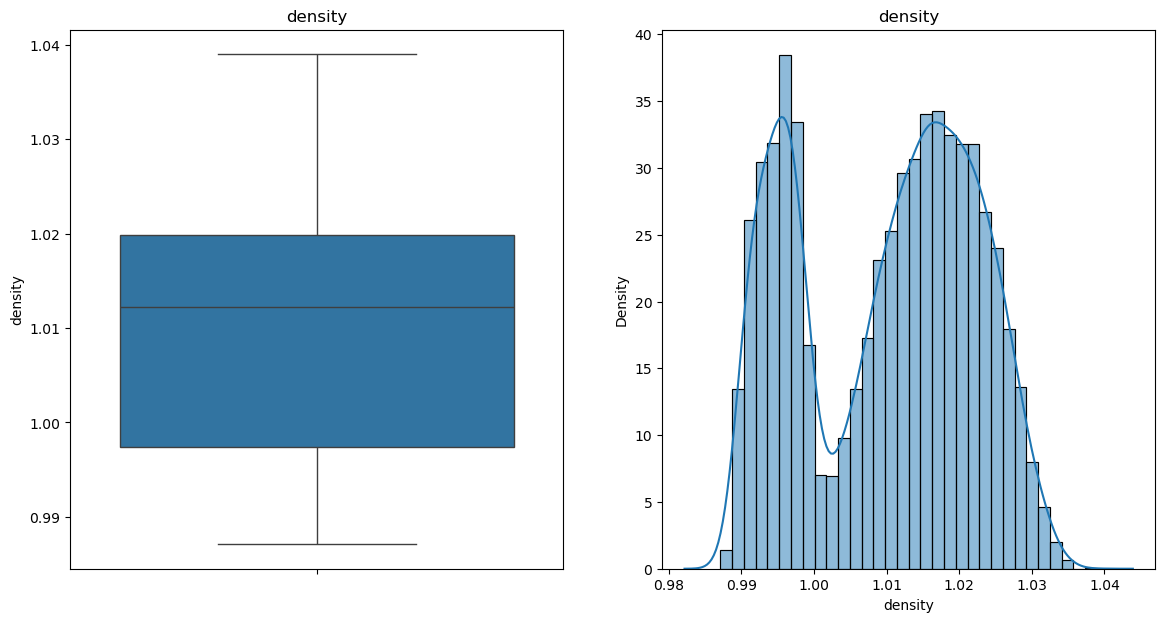

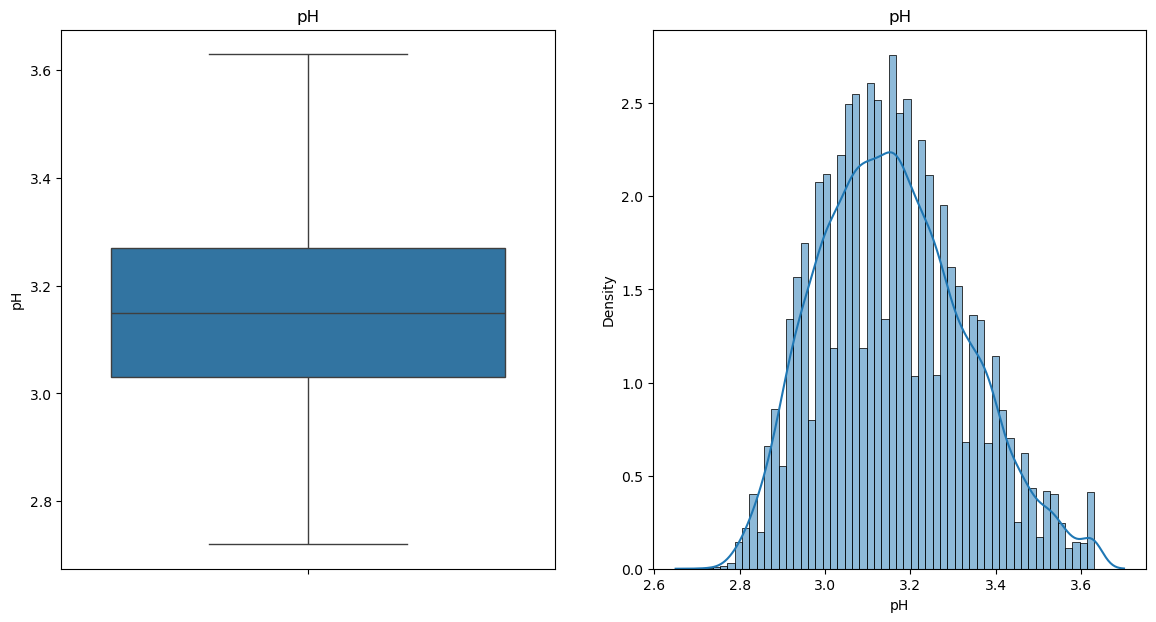

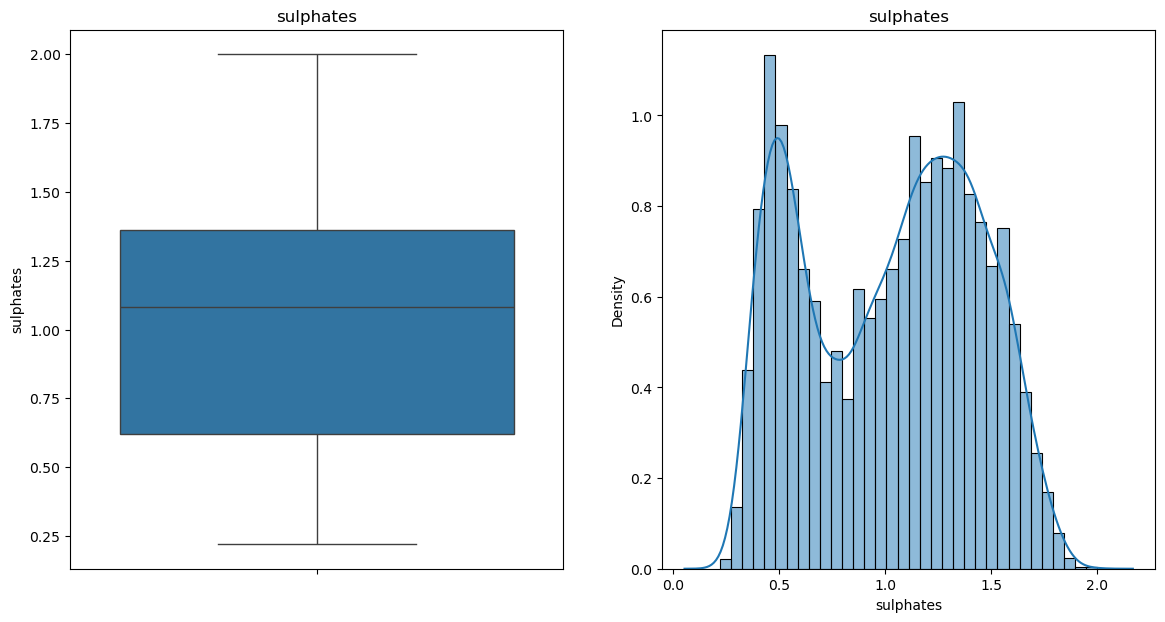

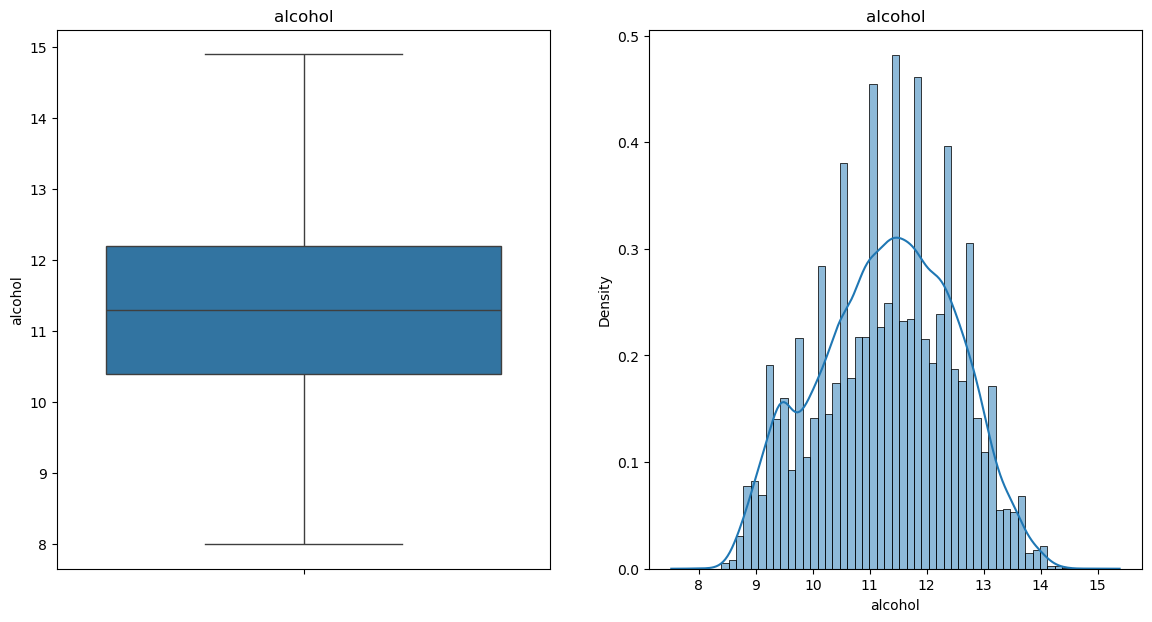

In [14]:
for col in int_feature:
   plt.figure(figsize=(14,7))
   plt.subplot(121)
   sns.boxplot(new_df_cap[col])
   plt.title(col)
    
   plt.subplot(122)
   sns.histplot(new_df_cap[col], kde=True,stat="density", kde_kws=dict(cut=3))
   plt.title(col)
plt.show()

<Axes: >

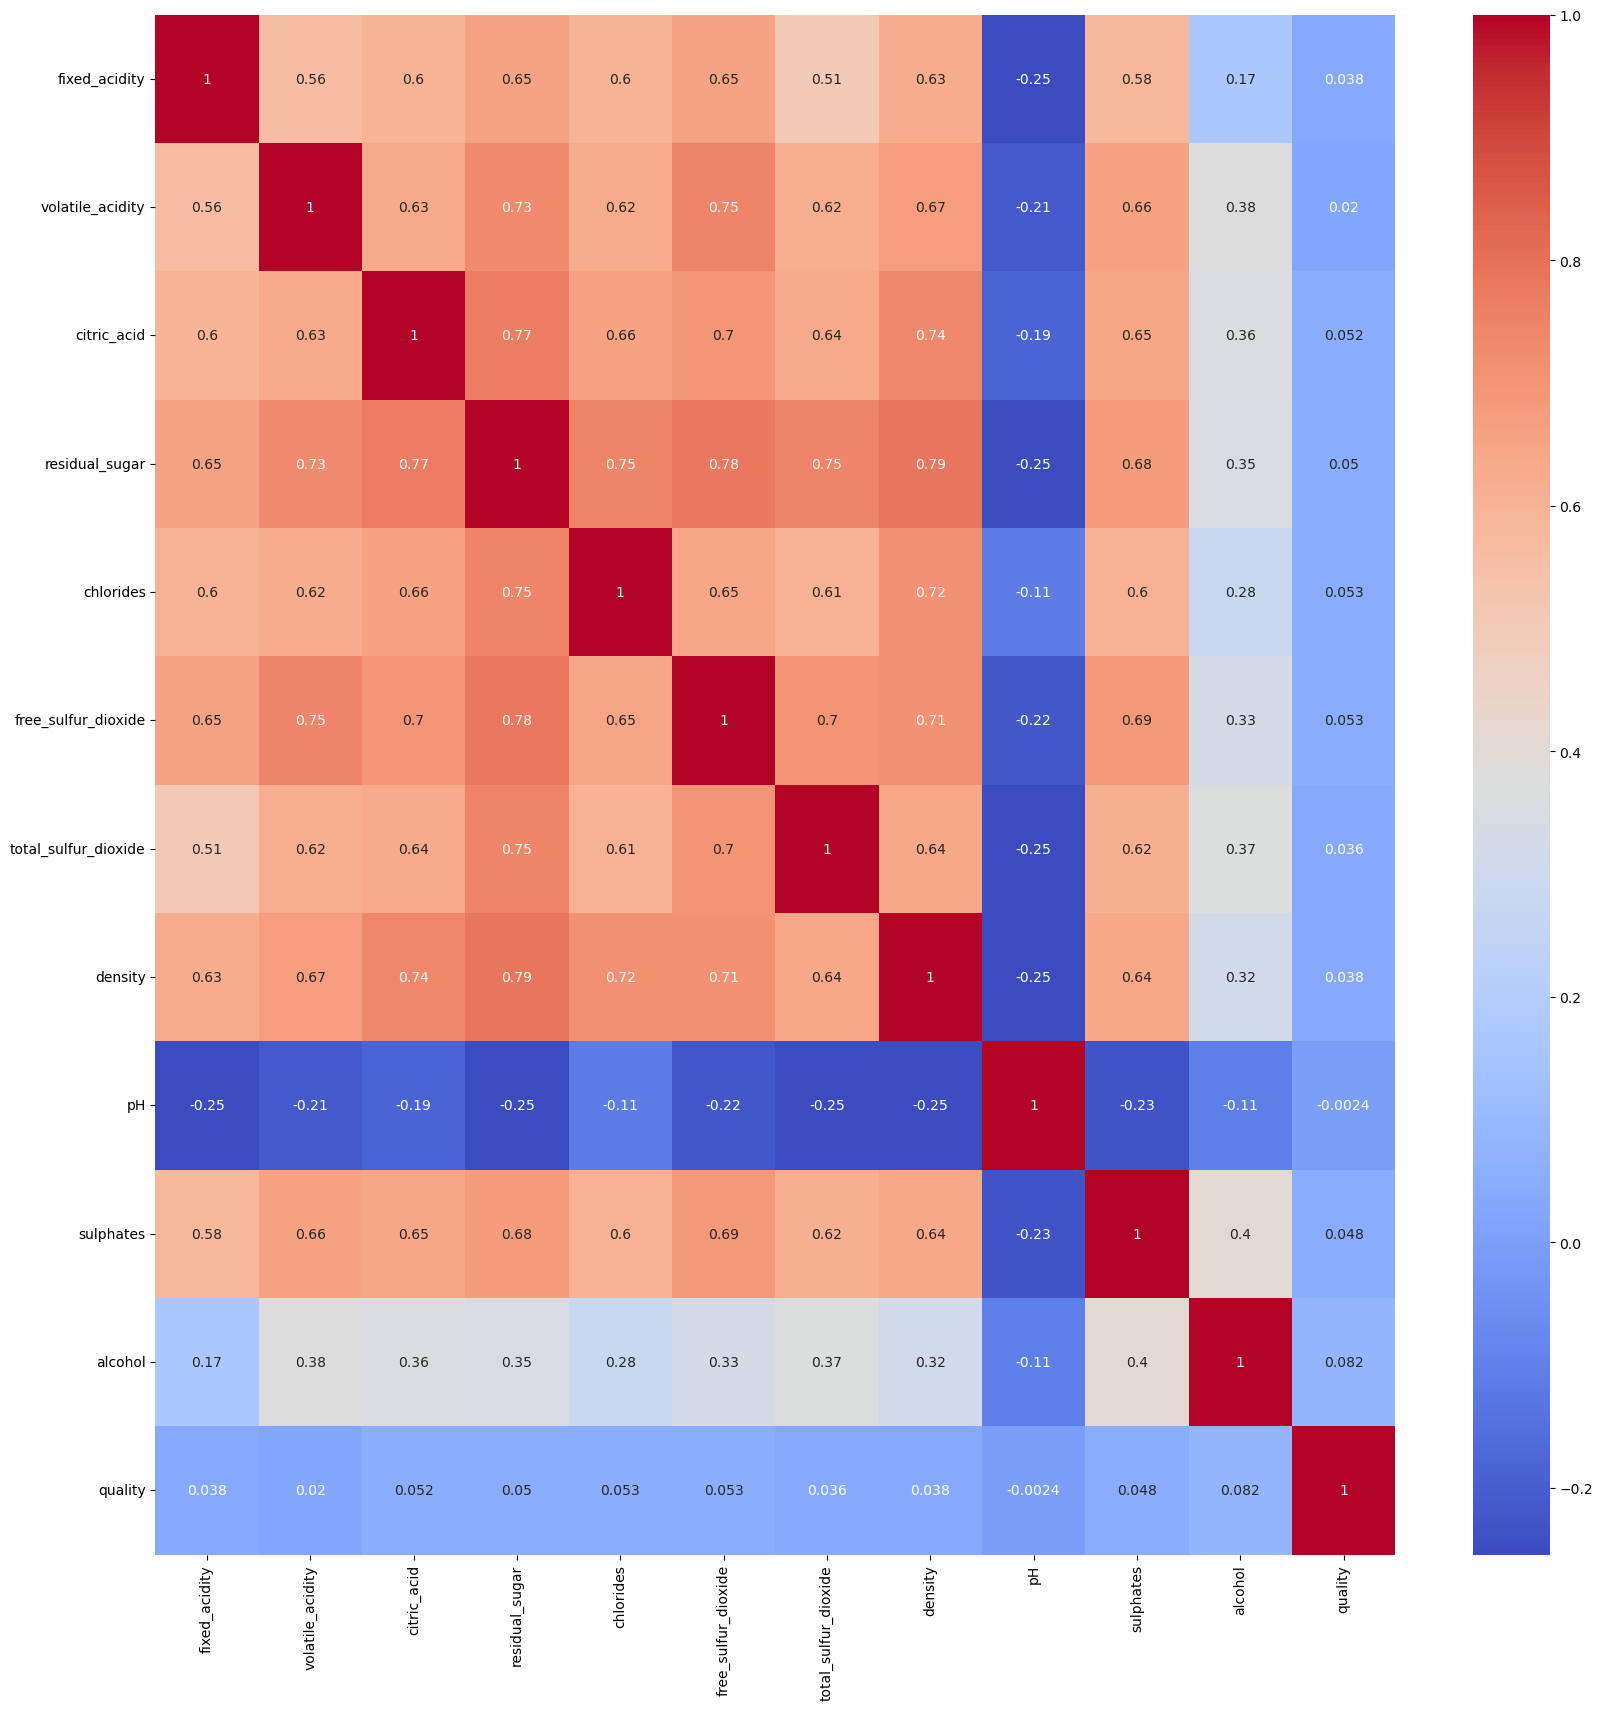

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Fit the Model

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

# Standardize features (KNN is distance-based, so scaling helps)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Train KNN Classifier
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    algorithm='ball_tree',
    leaf_size=30,
    p=1,
    metric='minkowski',
    metric_params=None,
    n_jobs=None
)
knn.fit(X_train, y_train)
# Predict on test data
y_pred = knn.predict(X_test)

# # Evaluate model performance
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

In [19]:
# Compute F1 Scores
f1_macro = f1_score(y_test, y_pred, average='macro')  # Average across all classes
f1_micro = f1_score(y_test, y_pred, average='micro')  # Treats all instances equally
f1_weighted = f1_score(y_test, y_pred, average='weighted')  # Weighted by class occurrences

In [20]:
# Print F1 Score Results
print(f"F1 Score (Macro): {f1_macro:.4f}")
print(f"F1 Score (Micro): {f1_micro:.4f}")
print(f"F1 Score (Weighted): {f1_weighted:.4f}")

F1 Score (Macro): 0.6074
F1 Score (Micro): 0.6071
F1 Score (Weighted): 0.6067


In [21]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.57      0.66      0.61       566
           4       0.63      0.59      0.61       627
           5       0.67      0.56      0.61       621
           6       0.64      0.67      0.66       580
           7       0.57      0.53      0.55       625
           8       0.58      0.61      0.59       608
           9       0.60      0.65      0.63       573

    accuracy                           0.61      4200
   macro avg       0.61      0.61      0.61      4200
weighted avg       0.61      0.61      0.61      4200



Text(0.5, 25.722222222222214, 'Predicted')

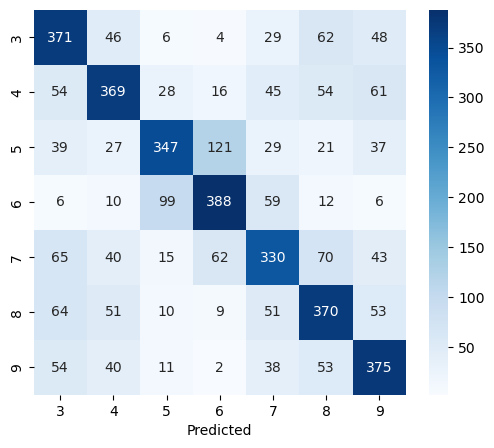

In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")